In [207]:
def optimize_position(edge1, edge2):
    # edge 1 and edge 2 are vectors of the same length;
    # Pad both vectors with zeros
    l = len(edge_1)
    edge1 = np.pad(edge_1, [0, l])
    edge2 = np.pad(edge_2, [0, l])
    maxcorr = 0
    for offset in range(-l, l+1):
        edge1 = np.roll(edge2, 1)
        mat = np.array([edge1, edge2])
        corr = np.corrcoef(mat)[0, 1]
        if corr > maxcorr:
            maxcorr = corr
            opt_offset = offset
    return offset

In [303]:
def match_dims(img1, img2, dim=1):
    max_dim = np.max([img1.shape[dim], img2.shape[dim]]);
    if dim == 1:
        img1 = imresize(img1, (img1.shape[0], max_dim));
        img2 = imresize(img2, (img2.shape[0], max_dim));
    if dim == 0:
        img1 = imresize(img1, (max_dim, img1.shape[1]));
        img2 = imresize(img2, (max_dim, img1.shape[1]));
    return (img1, img2)

def get_edge(img, n, edge='bottom'):
    # Returns nearest n rows/colummns of pixels to edge for depth 1 image
    if edge == 'bottom':
        return img[-n:, :]
    if edge == 'top':
        return img[:n, :]
    if edge == 'left':
        return img[:, :n]
    if edge == 'right':
        return img[:, -n:]
    
def edge_mean(img, edge='bottom'):
    # Returns depth-10 mean of image edge
        if edge in ['bottom', 'top']:
            return np.mean(get_edge(img, 10, edge), axis=0);
        if edge in ['left', 'right']:
            return np.mean(get_edge(img, 10, edge).T, axis=1);

In [ ]:
    # Extract image lightnesses
    img1 = cv2.cvtColor(img1.copy(), cv2.COLOR_RGB2HSV)[:,:,-1]
    img2 = cv2.cvtColor(img2.copy(), cv2.COLOR_RGB2HSV)[:,:,-1]
    dim_dct = {0:['top', 'bottom'], 1:['left', 'right'],};
    # Create four edge mean vectors for each edge
    img1_edge = edge_mean(img1, dim_dct[dim][0])
    img2_edge = edge_mean(img2, dim_dct[dim][1])
    # Center these at zero and scale them
    img1_edge = (img1_edge - img1_edge.mean())/img1_edge.std()
    img2_edge = (img2_edge - img2_edge.mean())/img2_edge.std()
    # Pad the first vector with zeros by about 300 px at either end
    img1_edge = np.pad(img1_edge, (PAD_VALUE, PAD_VALUE), mode='constant', constant_values=0)
    # Convolve the edges for the offset
    offset = np.argmax(np.convolve(img1_edge, img2_edge)) - PAD_VALUE
    # Return a stitch of the aligned images
    

In [20]:
import numpy as np
from scipy.ndimage import imread
import glob
from matplotlib import pyplot as plt
from skimage import imresize
%matplotlib inline

ImportError: cannot import name 'imresize'

In [3]:
img_fps = glob.glob('./k38_lom_cropped/*')

In [ ]:
sizes = np.array([imread(fp).shape for fp in img_fps])

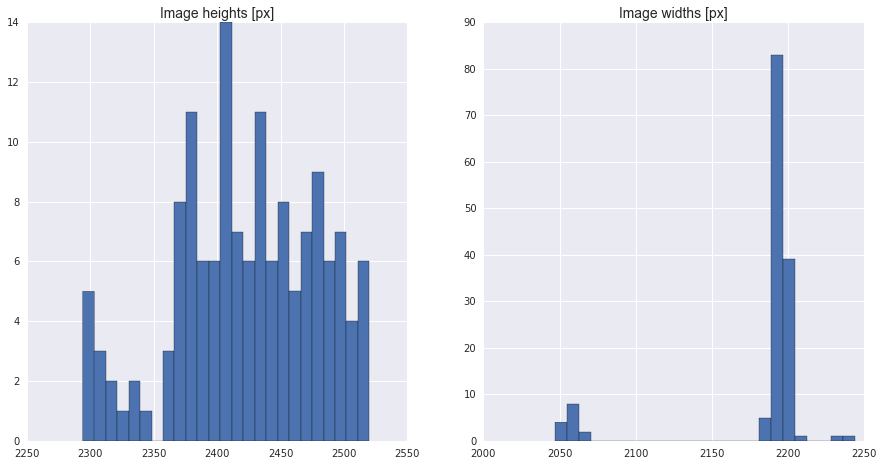

In [51]:
_, axs = plt.subplots(1, 2, figsize=(15, 7.5))
axs[0].hist(sizes[:, 0], bins=25); axs[1].hist(sizes[:, 1], bins=25);
axs[0].set_title('Image heights [px]', size=14); axs[1].set_title('Image widths [px]', size=14);

- Image widths are generally v. similar
- Image heights vary more

In [ ]:
# Glue together vertically first

In [4]:
img_T = imread(img_fps[5])
img_B = imread(img_fps[17])

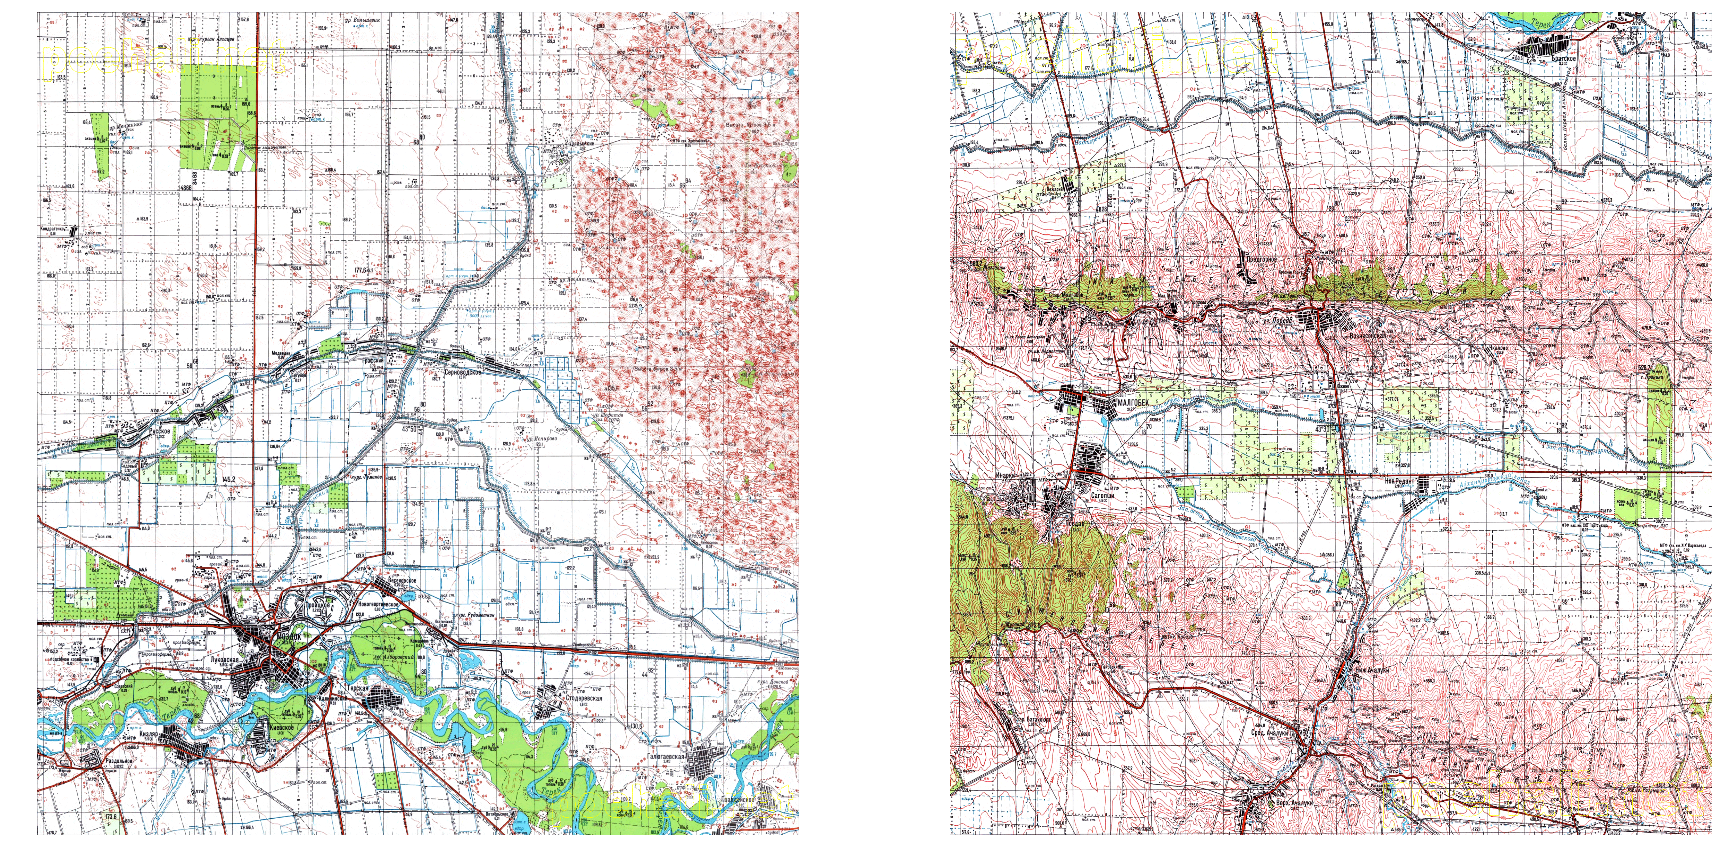

In [9]:
_, axs = plt.subplots(1, 2, figsize=(30, 15))
axs[0].imshow(img_T); axs[1].imshow(img_B); axs[0].axis('off'); axs[1].axis('off');

In [6]:
def stitch(img1, img2, dim=1):
    max_dim = np.max([img1.shape[dim], img2.shape[dim]]);
    if dim == 1:
        img1 = imresize(img1, (img1.shape[0], max_dim));
        img2 = imresize(img2, (img2.shape[0], max_dim));
    if dim == 0:
        img1 = imresize(img1, (max_dim, img1.shape[1]));
        img2 = imresize(img2, (max_dim, img1.shape[1]));
    return np.concatenate([img1, img2], axis=abs(dim-1))

In [10]:
plt.figure(figsize=(20, 20))
img_ax = plt.imshow(stitch(img_T, img_B, dim=1))
plt.axis('off');

NameError: name 'imresize' is not defined

In [ ]:
# Top-left: 43.998068, 44.518597
# Top-right: 43.987283, 44.982690
# Bottom-left: 43.350028, 44.529421

In [353]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [1]:
plt.figure(figsize=(30, 30))

m = Basemap(llcrnrlon=44.529421, llcrnrlat=43.250028,
            urcrnrlon=44.982690, urcrnrlat=43.987283,
            lon_0=44.7560555, lat_0=43.61865557,
            projection = 'tmerc',
            ellps = 'WGS84')
m.drawcoastlines()
# Parallels (lat)
parallels = np.arange(43, 44, 0.03)
m.drawparallels(parallels, color='#ff8300', linewidth=2)
# Meridians (lon)
meridians = np.arange(44, 45, 0.03)
m.drawmeridians(meridians, color='#ff8300', linewidth=2)
plt.imshow(stitch(img_T, img_B, dim=1),
          extent = [0, 18404*2, 0, 40930*2]);
#for i in np.arange(len(meridians)):
#    plt.annotate(np.str(meridians[i]),xy=m(meridians[i],0),xycoords='data')
#for i in np.arange(len(parallels)):
#    plt.annotate(np.str(parallels[i]),xy=m(180,parallels[i]),xycoords='data')

NameError: name 'plt' is not defined